# Hyperparameters

Consider the Booth test function (below). This function varies differently in different directions, and these directions are somewhat skewed with respect to the inputs. Our agent will automatically fit the right hyperparameters to account for this.

Text(0, 0.5, 'x2')

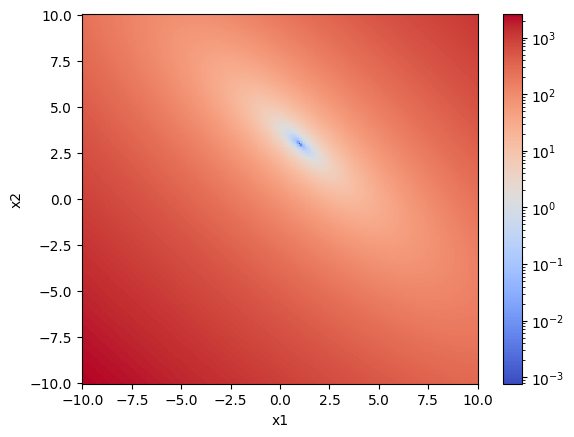

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from blop.utils import functions

x1 = x2 = np.linspace(-10, 10, 256)
X1, X2 = np.meshgrid(x1, x2)

F = functions.booth(X1, X2)

plt.pcolormesh(x1, x2, F, norm=mpl.colors.LogNorm(), shading="auto")
plt.colorbar()
plt.xlabel("x1")
plt.ylabel("x2")

The optimization goes faster if our model understands how the function changes as we change the inputs in different ways. The way it picks up on this is by starting from a general model that could describe a lot of functions, and making it specific to this one by choosing the right hyperparameters. Our Bayesian agent is very good at this, and only needs a few samples to figure out what the function looks like:

In [2]:
def digestion(df):
    for index, entry in df.iterrows():
        df.loc[index, "booth"] = functions.booth(entry.x1, entry.x2)

    return df

2025-02-18 10:19:50.469 INFO: Executing plan <generator object Agent.learn at 0x7f02cff55f80>
2025-02-18 10:19:50.470 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f02d675ed20> from 'idle' -> 'running'




Transient Scan ID: 1     Time: 2025-02-18 10:19:50
Persistent Unique Scan ID: '19760305-40a0-4863-8ee8-3375b8bdf2fc'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 10:19:50.4 |     -0.709 |      0.423 |
|         2 | 10:19:50.4 |     -2.500 |     -0.359 |
|         3 | 10:19:50.4 |     -4.320 |     -1.641 |
|         4 | 10:19:50.4 |     -5.852 |     -4.084 |
|         5 | 10:19:50.4 |     -1.016 |     -5.415 |
|         6 | 10:19:50.4 |      2.716 |     -4.555 |
|         7 | 10:19:50.4 |      3.776 |     -3.261 |
|         8 | 10:19:50.5 |      5.271 |     -2.329 |
|         9 | 10:19:50.5 |      1.174 |     -0.987 |
|        10 | 10:19:50.5 |      1.653 |      1.298 |
|        11 | 10:19:50.5 |      3.480 |      2.955 |
|        12 | 10:19:50.5 |      5.005 |      3.523 |
|        13 | 10:19:50.5 |      0.175 |      5.229 |
|        14

2025-02-18 10:19:50.932 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f02d675ed20> from 'running' -> 'idle'
2025-02-18 10:19:50.933 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f02cff55f80>


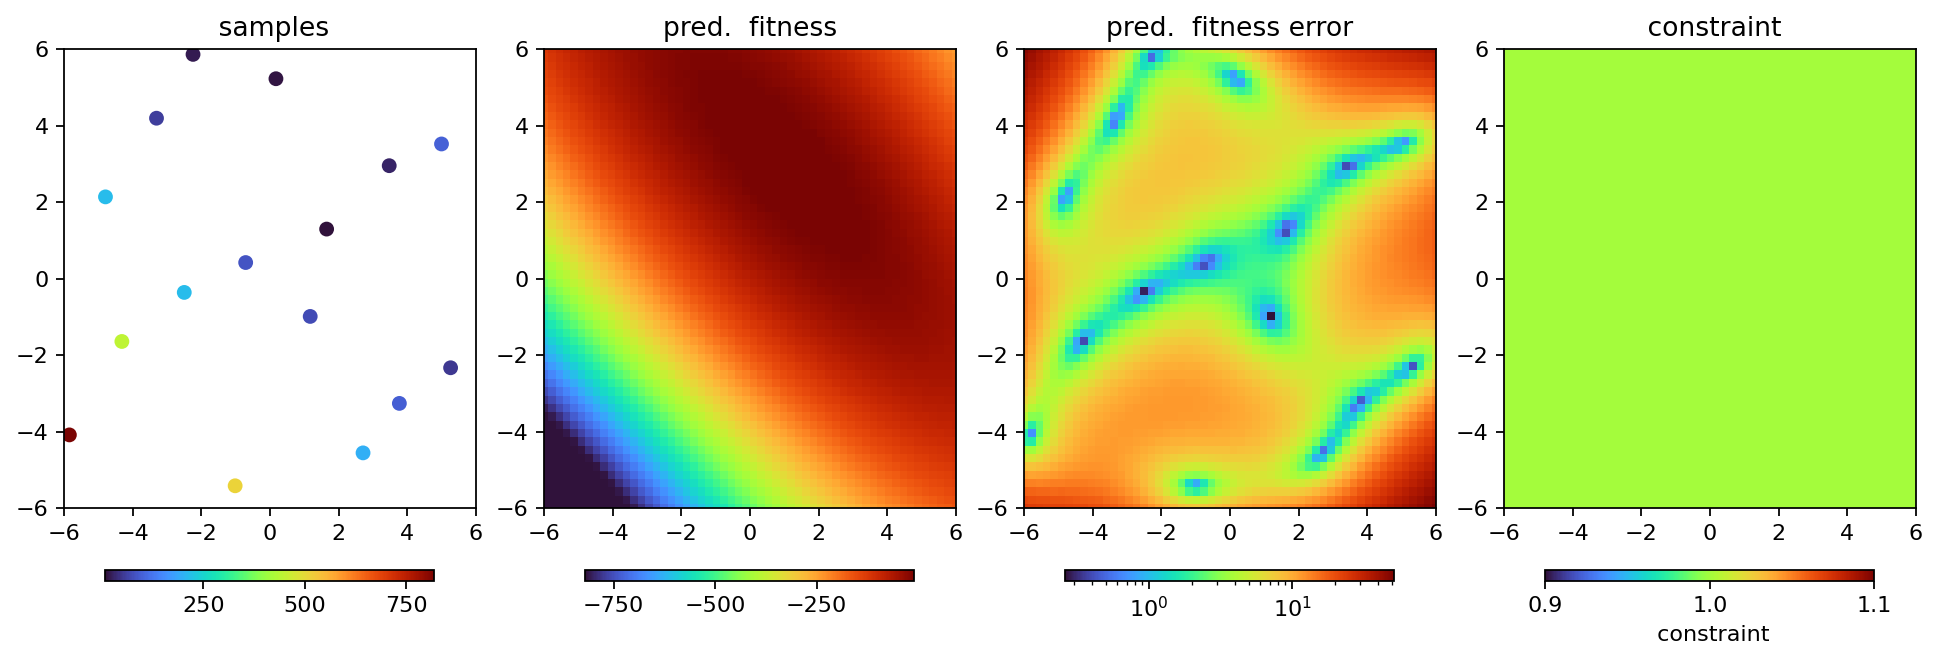

In [3]:
%run -i prepare_re_env.py --db-type=temp


from blop import DOF, Objective, Agent

dofs = [
    DOF(name="x1", search_domain=(-6, 6)),
    DOF(name="x2", search_domain=(-6, 6)),
]

objectives = [
    Objective(name="booth", target="min"),
]


agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

RE(agent.learn(acqf="qr", n=16))

agent.plot_objectives()

In addition to modeling the fitness of the task, the agent models the probability that an input will be feasible:

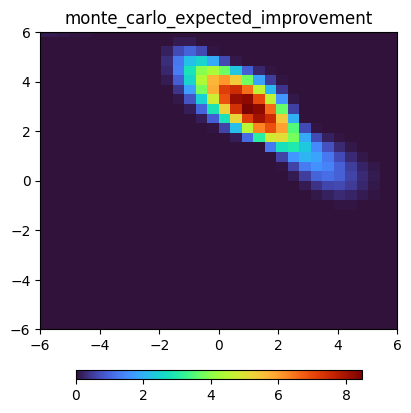

In [4]:
agent.plot_acquisition(acqf="qei")

2025-02-18 10:19:51.486 INFO: Executing plan <generator object Agent.learn at 0x7f02a406a110>
2025-02-18 10:19:51.487 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f02d675ed20> from 'idle' -> 'running'




Transient Scan ID: 2     Time: 2025-02-18 10:19:52
Persistent Unique Scan ID: 'e7ed5a95-8b93-4e38-88bd-bc2cbbb8fac0'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 10:19:52.1 |      0.119 |      3.630 |
|         2 | 10:19:52.1 |      1.029 |      2.994 |
|         3 | 10:19:52.1 |      1.645 |      2.433 |
|         4 | 10:19:52.1 |      2.700 |      1.341 |
+-----------+------------+------------+------------+
generator list_scan ['e7ed5a95'] (scan num: 2)





Transient Scan ID: 3     Time: 2025-02-18 10:19:53
Persistent Unique Scan ID: '3d7aa847-c9cc-4fd6-9cd3-c8a60971e7f7'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 10:19:53.6 |      0.992 |      2.854 |
|         2 | 10:19:53.6 |      

2025-02-18 10:19:56.407 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7f02d675ed20> from 'running' -> 'idle'
2025-02-18 10:19:56.407 INFO: Cleaned up from plan <generator object Agent.learn at 0x7f02a406a110>


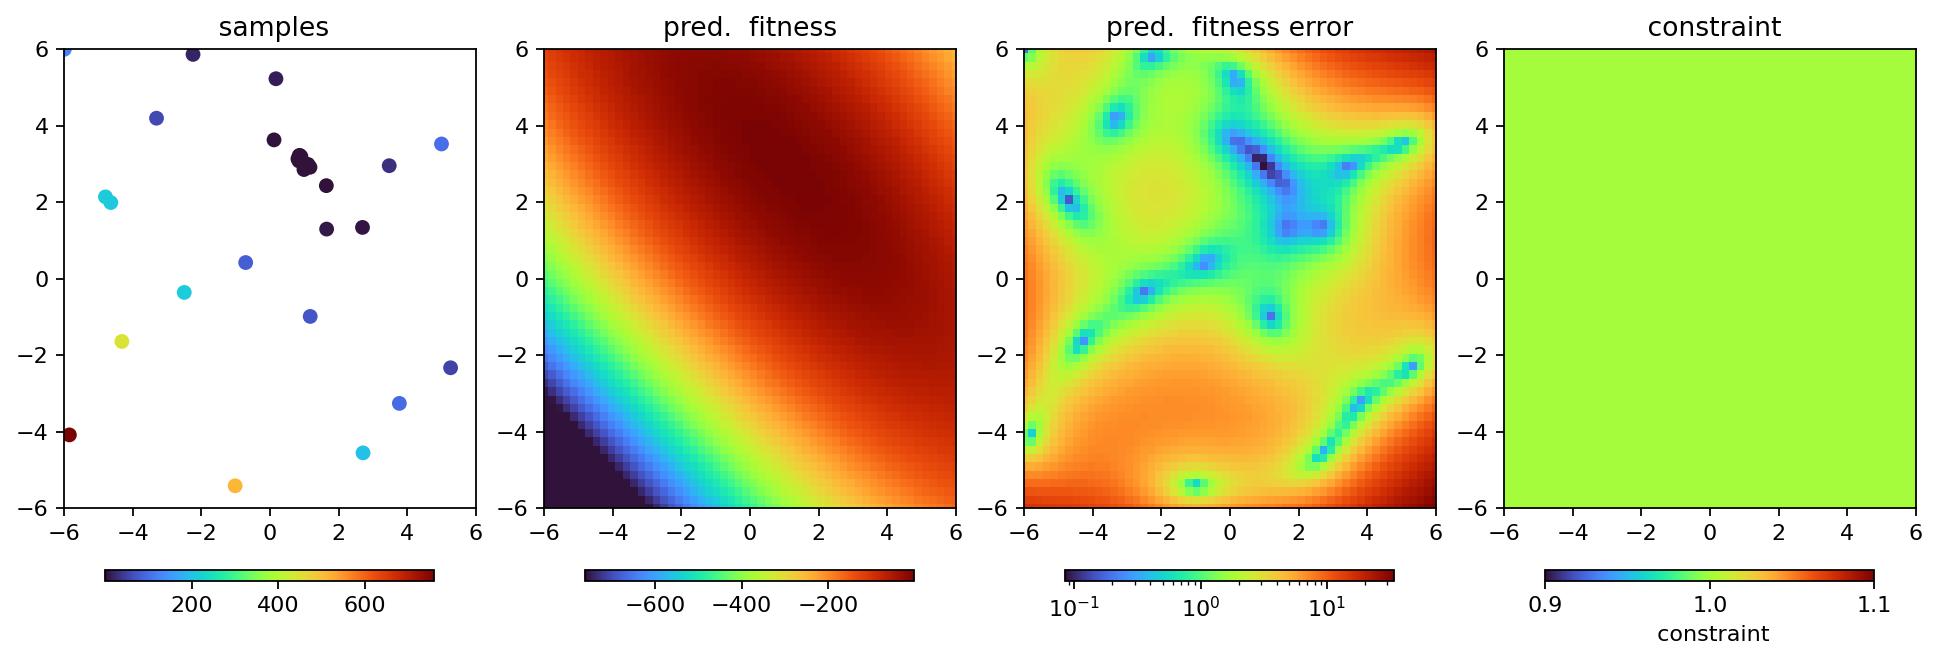

In [5]:
RE(agent.learn("qei", n=4, iterations=4))
agent.plot_objectives()

In [6]:
agent.best

x1                                 1.0036
x2                               3.005708
booth                            0.000392
time        2025-02-18 15:19:55.248900890
acqf     monte_carlo_expected_improvement
Name: 26, dtype: object